# Coronavirus Data Modeling


### Background
From Wikipedia...

"The 2019–20 coronavirus pandemic is an ongoing global pandemic of coronavirus disease 2019 (COVID-19) caused by the severe acute respiratory syndrome coronavirus 2 (SARS-CoV-2). The virus was first reported in Wuhan, Hubei, China, in December 2019.[5][6] On March 11, 2020, the World Health Organization declared the outbreak a pandemic.[7] As of March 12, 2020, over 134,000 cases have been confirmed in more than 120 countries and territories, with major outbreaks in mainland China, Italy, South Korea, and Iran.[3] Around 5,000 people, with about 3200 from China, have died from the disease. More than 69,000 have recovered.[4]

The virus spreads between people in a way similar to influenza, via respiratory droplets from coughing.[8][9][10] The time between exposure and symptom onset is typically five days, but may range from two to fourteen days.[10][11] Symptoms are most often fever, cough, and shortness of breath.[10][11] Complications may include pneumonia and acute respiratory distress syndrome. There is currently no vaccine or specific antiviral treatment, but research is ongoing. Efforts are aimed at managing symptoms and supportive therapy. Recommended preventive measures include handwashing, maintaining distance from other people (particularly those who are sick), and monitoring and self-isolation for fourteen days for people who suspect they are infected.[9][10][12]

Public health responses around the world have included travel restrictions, quarantines, curfews, event cancellations, and school closures. They have included the quarantine of all of Italy and the Chinese province of Hubei; various curfew measures in China and South Korea;[13][14][15] screening methods at airports and train stations;[16] and travel advisories regarding regions with community transmission.[17][18][19][20] Schools have closed nationwide in 22 countries or locally in 17 countries, affecting more than 370 million students.[21]"

https://en.wikipedia.org/wiki/2019–20_coronavirus_pandemic 

For ADDITIONAL BACKGROUND, see JHU's COVID-19 Resource Center:
https://coronavirus.jhu.edu/




#RPI IDEA 

Check out these resources that IDEA has put together. 

https://idea.rpi.edu/covid-19-resources

### The Assignment

Our lives have been seriously disrupted by the coronavirus pandemic, and there is every indication that this is going to be a global event which requires colloration in a global community to solve.  Studying the data provides an opportunity to connect the pandemic to the variety of themes from the class. 

A number of folks have already been examining this data. 
https://ourworldindata.org/coronavirus-source-data


1. Discussion.  What is the role of open data?  Why is it important in this case?

2. Read this. 
https://medium.com/@tomaspueyo/coronavirus-act-today-or-people-will-die-f4d3d9cd99ca


What is the role of bias in the data?  Identify 2 different ways that the data could be biased.  

In [3]:
#Load some data
import pandas as pd
df=pd.read_csv('https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_daily_reports/10-21-2020.csv')
df

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incidence_Rate,Case-Fatality_Ratio
0,NaN,NaN,NaN,Afghanistan,2020-10-22 04:24:27,33.939110,67.709953,40510,1501,33824,5185.0,Afghanistan,104.063001,3.705258
1,NaN,NaN,NaN,Albania,2020-10-22 04:24:27,41.153300,20.168300,17948,462,10341,7145.0,Albania,623.670860,2.574103
2,NaN,NaN,NaN,Algeria,2020-10-22 04:24:27,28.033900,1.659600,55081,1880,38482,14719.0,Algeria,125.609327,3.413155
3,NaN,NaN,NaN,Andorra,2020-10-22 04:24:27,42.506300,1.521800,3811,63,2470,1278.0,Andorra,4932.375591,1.653109
4,NaN,NaN,NaN,Angola,2020-10-22 04:24:27,-11.202700,17.873900,8338,255,3040,5043.0,Angola,25.369476,3.058287
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3953,NaN,NaN,NaN,West Bank and Gaza,2020-10-22 04:24:27,31.952200,35.233200,48628,427,41935,6266.0,West Bank and Gaza,953.225536,0.878095
3954,NaN,NaN,NaN,Western Sahara,2020-10-22 04:24:27,24.215500,-12.885800,10,1,8,1.0,Western Sahara,1.674116,10.000000
3955,NaN,NaN,NaN,Yemen,2020-10-22 04:24:27,15.552727,48.516388,2057,597,1344,116.0,Yemen,6.896675,29.022849
3956,NaN,NaN,NaN,Zambia,2020-10-22 04:24:27,-13.133897,27.849332,16000,346,15168,486.0,Zambia,87.032410,2.162500


### Preprocessing
We have to deal with missing values first.

First let's check the missing values for each column. 

In [4]:
df.isnull().sum() 

FIPS                   697
Admin2                 692
Province_State         169
Country_Region           0
Last_Update              0
Lat                     81
Long_                   81
Confirmed                0
Deaths                   0
Recovered                0
Active                   3
Combined_Key             0
Incidence_Rate          81
Case-Fatality_Ratio     43
dtype: int64

In [6]:
df.loc[df['Province_State'].isnull(),:]

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incidence_Rate,Case-Fatality_Ratio
0,NaN,NaN,NaN,Afghanistan,2020-10-22 04:24:27,33.939110,67.709953,40510,1501,33824,5185.0,Afghanistan,104.063001,3.705258
1,NaN,NaN,NaN,Albania,2020-10-22 04:24:27,41.153300,20.168300,17948,462,10341,7145.0,Albania,623.670860,2.574103
2,NaN,NaN,NaN,Algeria,2020-10-22 04:24:27,28.033900,1.659600,55081,1880,38482,14719.0,Algeria,125.609327,3.413155
3,NaN,NaN,NaN,Andorra,2020-10-22 04:24:27,42.506300,1.521800,3811,63,2470,1278.0,Andorra,4932.375591,1.653109
4,NaN,NaN,NaN,Angola,2020-10-22 04:24:27,-11.202700,17.873900,8338,255,3040,5043.0,Angola,25.369476,3.058287
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3953,NaN,NaN,NaN,West Bank and Gaza,2020-10-22 04:24:27,31.952200,35.233200,48628,427,41935,6266.0,West Bank and Gaza,953.225536,0.878095
3954,NaN,NaN,NaN,Western Sahara,2020-10-22 04:24:27,24.215500,-12.885800,10,1,8,1.0,Western Sahara,1.674116,10.000000
3955,NaN,NaN,NaN,Yemen,2020-10-22 04:24:27,15.552727,48.516388,2057,597,1344,116.0,Yemen,6.896675,29.022849
3956,NaN,NaN,NaN,Zambia,2020-10-22 04:24:27,-13.133897,27.849332,16000,346,15168,486.0,Zambia,87.032410,2.162500


In [7]:
df.loc[df['Province_State'].notnull(),:]

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incidence_Rate,Case-Fatality_Ratio
8,NaN,NaN,Australian Capital Territory,Australia,2020-10-22 04:24:27,-35.4735,149.0124,114,3,110,1.0,"Australian Capital Territory, Australia",26.629292,2.631579
9,NaN,NaN,New South Wales,Australia,2020-10-22 04:24:27,-33.8688,151.2093,4363,53,3141,1169.0,"New South Wales, Australia",53.744765,1.214760
10,NaN,NaN,Northern Territory,Australia,2020-10-22 04:24:27,-12.4634,130.8456,33,0,33,0.0,"Northern Territory, Australia",13.436482,0.000000
11,NaN,NaN,Queensland,Australia,2020-10-22 04:24:27,-27.4698,153.0251,1165,6,1155,4.0,"Queensland, Australia",22.773922,0.515021
12,NaN,NaN,South Australia,Australia,2020-10-22 04:24:27,-34.9285,138.6007,485,4,473,8.0,"South Australia, Australia",27.611728,0.824742
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3944,NaN,NaN,Northern Ireland,United Kingdom,2020-10-22 04:24:27,54.7877,-6.4923,29992,629,0,29363.0,"Northern Ireland, United Kingdom",1593.962585,2.097226
3945,NaN,NaN,Scotland,United Kingdom,2020-10-22 04:24:27,56.4907,-4.2026,50903,2653,0,48250.0,"Scotland, United Kingdom",931.726246,5.211874
3946,NaN,NaN,Turks and Caicos Islands,United Kingdom,2020-10-22 04:24:27,21.6940,-71.7979,698,6,689,3.0,"Turks and Caicos Islands, United Kingdom",1802.779069,0.859599
3947,NaN,NaN,Unknown,United Kingdom,2020-10-22 04:24:27,NaN,NaN,0,0,0,0.0,"Unknown, United Kingdom",NaN,NaN


### Missing Values and data
3. How might we deal with missing values? How is the data structured such that aggregation might be relevant.  



In [9]:
#Note the country is then the index here. 
country=pd.pivot_table(df, values=['Confirmed',	'Deaths',	'Recovered'], index='Country_Region',  aggfunc='sum')

In [10]:
country

,Confirmed,Deaths,Recovered
Country_Region,,,
Afghanistan,40510,1501,33824
Albania,17948,462,10341
Algeria,55081,1880,38482
Andorra,3811,63,2470
Angola,8338,255,3040
...,...,...,...
West Bank and Gaza,48628,427,41935
Western Sahara,10,1,8
Yemen,2057,597,1344


### Clustering 

Here is and example of the elbow method, which is used to understand the number of clusters. 

https://scikit-learn.org/stable/modules/clustering.html#k-means

The K-means algorithm aims to choose centroids that minimise the inertia, or within-cluster sum-of-squares criterion.

By looking at the total inertia at different numbers of clusters, we can get an idea of the appropriate number of clusters.



In [11]:
#This indicates the 

from sklearn.cluster import KMeans
sum_sq = {}
for k in range(1,30):
    kmeans = KMeans(n_clusters = k).fit(country)
    # Inertia: Sum of distances of samples to their closest cluster center
    sum_sq[k] = kmeans.inertia_
  
  

In [12]:
#ineria at different levels of K
sum_sq

{1: 240200523742595.03,
 2: 26118277525526.312,
 3: 16121977356352.586,
 4: 9790709951044.086,
 5: 4452358099978.585,
 6: 2142071723858.3994,
 7: 1302665996377.292,
 8: 807981658417.6555,
 9: 478991735848.45557,
 10: 377405453788.2289,
 11: 307152747322.0111,
 12: 245677659711.38748,
 13: 189518387573.89166,
 14: 149438125618.776,
 15: 120686764650.91898,
 16: 98334335773.64725,
 17: 81825024570.2655,
 18: 68432527611.26552,
 19: 56394991824.24425,
 20: 49709594818.66223,
 21: 46165271732.27986,
 22: 39720129392.78972,
 23: 34291438369.473236,
 24: 30241197922.729294,
 25: 26642803384.44824,
 26: 24316546754.258953,
 27: 21778298754.866142,
 28: 19306461700.0672,
 29: 17073793380.731209}

## The Elbow Method

Not a type of criteria like p<0.05, but the elbow method you look for where the change in the variance explained from adding more clusters drops extensively. 

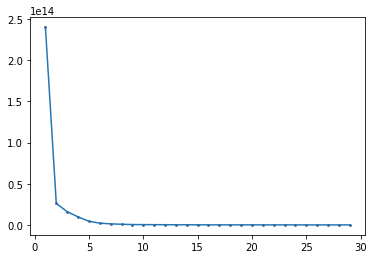

In [13]:
# plot elbow graph
import matplotlib
from matplotlib import pyplot as plt
plt.plot(list(sum_sq.keys()),
         list(sum_sq.values()),
        linestyle = '-',
        marker = 'H',
        markersize = 2,
        markerfacecolor = 'red')

## Looks like we can justify 5 clusters. 

See how adding the 5th doesn't really impact the total variance as much?  It might be interesting to do the analysis both at 4 and 5 and try to interpret. 

In [20]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(country)
country['y_kmeans'] = kmeans.predict(country)


,Confirmed,Deaths,Recovered,y_kmeans
Country_Region,,,,
Afghanistan,40510,1501,33824,0
Albania,17948,462,10341,0
Algeria,55081,1880,38482,0
Andorra,3811,63,2470,0
Angola,8338,255,3040,0
...,...,...,...,...
West Bank and Gaza,48628,427,41935,0
Western Sahara,10,1,8,0
Yemen,2057,597,1344,0


## Looks like they are mostly 0s.  Let's merge our data back together so we could get a clearer picture. 


In [19]:
loc=pd.pivot_table(df, values=['Lat','Long_'], index='Country_Region',  aggfunc='mean')
#loc['cluster']=y_kmeans
loc

,Lat,Long_
Country_Region,,
Afghanistan,33.939110,67.709953
Albania,41.153300,20.168300
Algeria,28.033900,1.659600
Andorra,42.506300,1.521800
Angola,-11.202700,17.873900
...,...,...
West Bank and Gaza,31.952200,35.233200
Western Sahara,24.215500,-12.885800
Yemen,15.552727,48.516388


In [25]:
alldata=country.merge(loc, left_index=True, right_index=True)

In [26]:
#join in our dataframes

alldata.to_csv("alldata.csv")  
alldata

,Confirmed,Deaths,Recovered,y_kmeans,Lat,Long_
Country_Region,,,,,,
Afghanistan,40510,1501,33824,0,33.939110,67.709953
Albania,17948,462,10341,0,41.153300,20.168300
Algeria,55081,1880,38482,0,28.033900,1.659600
Andorra,3811,63,2470,0,42.506300,1.521800
Angola,8338,255,3040,0,-11.202700,17.873900
...,...,...,...,...,...,...
West Bank and Gaza,48628,427,41935,0,31.952200,35.233200
Western Sahara,10,1,8,0,24.215500,-12.885800
Yemen,2057,597,1344,0,15.552727,48.516388


In [27]:
#Alldata
from google.colab import files
files.download("alldata.csv")

ModuleNotFoundError: No module named 'google.colab'

In [ ]:
alldata.sort_values('cluster', inplace=True)

#How do we interpret our clusters? 

In [22]:
alldata[alldata.cluster!=0]

,Confirmed,Deaths,Recovered,Latitude,Longitude,cluster
Country/Region,,,,,,
China,81397,3265,72362,32.729748,111.684242,1
Germany,24873,94,266,51.165700,10.451500,2
US,33276,417,178,38.112296,-84.664082,2
France,16044,674,2200,3.320689,-13.517378,2
Iran,21638,1685,7931,32.427900,53.688000,2
Spain,28768,1772,2575,40.463700,-3.749200,2
Italy,59138,5476,7024,41.871900,12.567400,3


In [19]:
#Details
pd.set_option('display.max_rows', 500)  #this allows us to see all rows. 
alldata[alldata.cluster==0]

,Confirmed,Deaths,Recovered,Latitude,Longitude,cluster
Country/Region,,,,,,
Afghanistan,40,1,1,33.939100,67.710000,0
Albania,89,2,2,41.153300,20.168300,0
Algeria,201,17,65,28.033900,1.659600,0
Andorra,113,1,1,42.506300,1.521800,0
Angola,2,0,0,-11.202700,17.873900,0
Antigua and Barbuda,1,0,0,17.060800,-61.796400,0
Argentina,225,4,3,-38.416100,-63.616700,0
Armenia,194,0,2,40.069100,45.038200,0
Australia,1314,7,88,-24.502867,141.055589,0
